In [1]:
from pandas_datareader import data as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

from   scipy.io import loadmat
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from utility_funcs import *

import warnings
warnings.filterwarnings('ignore')

In [29]:
factors = pd.read_parquet('/Users/shaorui/Desktop/CMA/uqer_ALL_2018_20211029.parquet')
factor_list = [i for i in factors.columns if i not in ['code', 'day']]
factors

,code,day,ACCA,AccountsPayablesTDays,AccountsPayablesTRate,ACD20,ACD6,AD,AD20,AD6,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
1503209,1,20180102,-0.0054,NaN,NaN,0.1982,-0.2795,12757.9655,12652.7292,12725.5604,...,0.0084,0.0086,0.3211,-8.8562,1.0371,107.7442,180.1979,5.029855e+07,4.565558e+07,288.4328
1503210,2,20180102,-0.0183,140.0942,2.5697,1.8070,3.0092,963.0133,948.2568,931.2822,...,0.0044,0.0048,0.2531,-15.5769,1.2898,78.8776,99.7138,1.302589e+07,1.122418e+07,157.7246
1503211,4,20180102,0.0290,-7.8410,-45.9123,-0.8200,0.7100,27.8252,26.1287,27.2622,...,0.0074,0.0238,0.5312,-50.5685,1.0128,-69.9598,-59.1506,7.011181e+05,7.864474e+05,-1.4483
1503212,5,20180102,-0.1204,244.5818,1.4719,0.2500,0.1600,279.0290,278.9180,278.9788,...,0.0034,0.0053,0.4880,-22.3005,1.7491,60.7506,373.5183,1.693208e+06,1.935298e+06,2.4331
1503213,6,20180102,0.0176,96.0077,3.7497,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059343,688670,20211029,-0.0609,105.7735,3.4035,-12.7400,-7.0300,-14.6144,-12.2759,-13.9312,...,0.0354,0.0914,0.4717,11.8263,0.7516,-26.8833,-22.3007,5.561031e+05,4.170354e+05,-1.8446
5059344,688669,20211029,-0.1060,33.6442,10.7002,-8.4300,-2.0100,-52.3621,-48.5786,-50.9474,...,0.1162,0.0961,0.5588,-32.4686,1.1516,-23.3330,-51.2791,9.504433e+05,1.782440e+06,-1.1321
5059345,688668,20211029,-0.0939,100.6486,3.5768,5.6500,-3.8800,-34.3460,-34.7097,-34.2653,...,0.0289,0.0324,0.6199,26.9448,1.3135,-16.3761,-77.0204,4.789030e+05,4.358344e+05,0.8842
5059346,688667,20211029,-0.0848,100.5137,3.5816,20.5760,12.4800,-5.6294,-6.9951,-6.5022,...,0.0477,0.0562,0.4943,21.0391,1.3637,71.8149,250.1048,2.484040e+05,2.334109e+05,1.6411


In [4]:
DIABLO_FILE = '/Users/shaorui/Desktop/CMA/Diablo_EVA_20230411.parquet'
data_mat    = loadmat('/Users/shaorui/Desktop/CMA/_Andariel_20230411.mat')

ALLDAYS     = np.array(data_mat['Data'][0,0]['ALLDAY']).ravel()

# =============================================================================
#      READING
# =============================================================================
diablo      = pd.read_parquet(DIABLO_FILE)
diablo_mini = diablo[['day', 'code', 'amount', 'adjclose', 'adjopen','ret_nx_close','ret_nx_open','amt_20day',
                      'ret_5d_open', 'ret_20d_open',
                      'pctchange','pctchange_nx_morning', 'adjpreclose', 's_dq_mv']].copy()


del diablo
print('Diablo   loading...', diablo_mini.day.min(), '|>', diablo_mini.day.max())

citi_sector = pd.read_csv('/Users/shaorui/Desktop/CMA/citi_sector_33_info.csv', encoding="gbk")

jstockcode  = data_mat['Data'][0,0]['jstockcode'].ravel()
jipoday     = data_mat['Data'][0,0]['jipodate'].ravel()
jquitday    = data_mat['Data'][0,0]['jquitday'].ravel()
jstockname  = data_mat['Data'][0,0]['jstockname'].ravel()
EOM         = np.array(data_mat['Data'][0,0]['date_EOM']).ravel()
EOW         = np.array(data_mat['Data'][0,0]['date_EOW']).ravel()



ST          = np.asarray(data_mat['Data'][0,0]['ST'])
Citics1     = np.asarray(data_mat['Data'][0,0]['Citics'])[:,-1]
CITI        = np.zeros_like(Citics1)
for i in range(len(CITI)):
    CITI[i] = citi_sector.loc[citi_sector['code']==Citics1[i]]['id']
CITI[np.where(CITI==31)]=30
windforce  = pd.DataFrame({'code':jstockcode, 'name':jstockname, 'ipoday':jipoday, 'quitday':jquitday, 'citics_sector':Citics1, 'sector':CITI})
windforce2 = windforce[['code','name']].copy()
NWF = len(windforce)
print('Andariel loading...',ALLDAYS[-1], ' windforce=',NWF)

ZZ500info  = data_mat['GUNDAM'][0,0]['ZZ500info'] 
ZZ500_DAYS = [int(i) for i in ZZ500info[0,:]['date']]
INDEXPRICE_500 = data_mat['GUNDAM'][0,0]['Index_Price_ZZ500']  # day close open

HS300info  = data_mat['GUNDAM'][0,0]['HS300info'] 
HS300_DAYS = [int(i) for i in HS300info[0,:]['date']]
INDEXPRICE_300 = data_mat['GUNDAM'][0,0]['Index_Price_HS300']  # day close open

Diablo   loading... 20150105 |> 20230411
Andariel loading... 20230411  windforce= 5155


## 数据预处理

In [5]:
INTERVAL = 'w' # ['d', 'w', 'm'] 调仓周期：天，周，月

start_day = factors.day.min()
end_day = factors.day.max()
if INTERVAL == 'd':
    idx_start_day = np.where(ALLDAYS==start_day)[0][0]
    idx_end_day = np.where(ALLDAYS==end_day)[0][0]
    target_return = 'ret_nx_open'
elif INTERVAL == 'w':
    idx_start_day = np.where(EOW>start_day)[0][0]
    idx_end_day = np.where(EOW<end_day)[0][-1]
    target_return = 'weekly_return'
elif INTERVAL == 'm':
    idx_start_day = np.where(EOM>start_day)[0][0]
    idx_end_day = np.where(EOM<end_day)[0][-1]
    target_return = 'ret_20d_open'


print('测试时间：', start_day, '--', end_day)
print('调仓周期：', '每天' if INTERVAL == 'd' else '每周' if INTERVAL == 'w' else '每月' if INTERVAL == 'm' else '?')
print(idx_start_day, idx_end_day,target_return)


测试时间： 20180102 -- 20211029
调仓周期： 每周
409 604 weekly_return


In [332]:
def cal_buy_sell_day(days,EOW,ALLDAYS): 
    decision_day = np.sort(days.unique())
    ixx = [np.where(ALLDAYS==i)[0][0] for i in decision_day]
    next_ixx = [i+1 for i in ixx]
    buy_day = [ALLDAYS[i] for i in next_ixx]
    sell_day = [ALLDAYS[i] for i in next_ixx[1:]] + [ALLDAYS[ALLDAYS> [EOW[EOW>decision_day[-1]][0]]][0]]
    day_df = pd.DataFrame({'day':decision_day, 'buy_day': buy_day, 'sell_day': sell_day})
    return day_df


def cal_weekly_return(diablo, code_day, ALLDAYS, EOW):
    day_df = cal_buy_sell_day(code_day['day'],EOW,ALLDAYS)
    t = pd.merge(code_day, day_df, on='day')
    t = pd.merge(t, diablo[['code', 'day', 'adjopen']], how='left', left_on=['code','buy_day'], right_on=['code','day'])
    t.drop('day_y', axis=1, inplace=True)
    t.rename(columns={'day_x':'day', 'adjopen': 'buy_price'}, inplace=True)
    t = pd.merge(t, diablo[['code', 'day', 'adjopen']], how='left', left_on=['code','sell_day'], right_on=['code','day'])
    t.drop('day_y', axis=1, inplace=True)
    t.rename(columns={'day_x':'day', 'adjopen': 'sell_price'}, inplace=True)
    t['target_return'] = (t['sell_price'] / t['buy_price'] - 1) * 100
    return t['target_return']



In [342]:
## 剔除掉: 1. IPO<6M  2. ST/*ST  3. MA(amount, 20)<200w
def get_valid_pool(date, windforce):
    idx_eom = np.where(EOM <= date)[0][-1]
    st_today = ST[:, idx_eom]
    windforce['st'] = st_today

    t = datetime.strptime(str(date), '%Y%m%d')
    day_before_6m = int((t - relativedelta(months=6)).strftime('%Y%m%d'))

    wf = windforce[['code', 'ipoday', 'quitday', 'st', 'sector']].copy()
    wf = pd.merge(wf, diablo_mini[diablo_mini.day==date].copy(), how='left', on='code')
    wf['valid'] = (wf.ipoday < day_before_6m) & ((wf.quitday == 0) | (wf.quitday > date)) \
        & (wf.st==0) & (wf.amt_20day > 20000) & (wf.pctchange_nx_morning < 9.8)
    valid_pool = wf[wf.valid][['code', 'day', 'sector', 's_dq_mv', 'adjopen', 'ret_nx_open', 'ret_5d_open', 'ret_20d_open']]
    # valid_pool = pd.merge(valid_pool, factors[factors.day==date], how='left', on='code')

    return valid_pool

valid_pool = pd.DataFrame()
for iday in range(idx_start_day, idx_end_day+1):
    if INTERVAL == 'd':
        TODAY = ALLDAYS[iday]
    elif INTERVAL == 'w':
        TODAY = EOW[iday]
    elif INTERVAL == 'm':
        TODAY = EOM[iday]
    else:
        print('INTERVAL not found!')
    day_valid_pool = get_valid_pool(TODAY, windforce)
    valid_pool = pd.concat([valid_pool, day_valid_pool], ignore_index=True)

valid_pool['weekly_return'] = cal_weekly_return(diablo_mini, valid_pool[['code', 'day']], ALLDAYS, EOW)
valid_pool['weekly_return'].fillna(valid_pool['ret_5d_open'], inplace=True)

valid_pool


,code,day,sector,s_dq_mv,adjopen,ret_nx_open,ret_5d_open,ret_20d_open,weekly_return
0,4,20180105.0,28,192309.812500,94.400002,-1.171207,-4.024702,-16.492760,-4.024702
1,600601,20180105.0,28,809914.875000,21514.419922,-0.542051,-1.355046,-21.409225,-1.355046
2,600652,20180105.0,29,621196.812500,40420.851562,0.669336,13.520729,-13.520741,13.520729
3,600602,20180105.0,28,634171.875000,3740.590088,-0.277466,-0.277466,-10.263419,-0.277466
4,600651,20180105.0,16,935959.000000,56952.039062,0.520837,1.354170,-11.458338,1.354170
...,...,...,...,...,...,...,...,...,...
573404,300980,20211022.0,6,67674.046875,37.250000,3.439999,1.013339,8.693325,1.013339
573405,605016,20211022.0,6,86114.398438,27.540001,0.629163,-1.184309,10.214651,-1.184309
573406,605098,20211022.0,15,103109.007812,47.180000,2.831888,5.422783,-1.948184,5.422783
573407,300975,20211022.0,26,76204.796875,15.380000,-0.603139,0.603139,8.504224,0.603139


In [347]:
df = pd.merge(valid_pool, factors, how='left', on=['code', 'day'])
df

,code,day,sector,s_dq_mv,adjopen,ret_nx_open,ret_5d_open,ret_20d_open,weekly_return,ACCA,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
0,4,20180105.0,28,192309.812500,94.400002,-1.171207,-4.024702,-16.492760,-4.024702,0.0290,...,0.0133,0.0237,0.4893,-34.3540,0.9027,-8.1089,53.0478,4.947679e+05,6.611928e+05,-0.8029
1,600601,20180105.0,28,809914.875000,21514.419922,-0.542051,-1.355046,-21.409225,-1.355046,0.0411,...,0.0026,0.0045,0.4509,-44.2399,1.0392,55.4666,6.2256,1.321787e+06,3.221577e+06,-10.8052
2,600652,20180105.0,29,621196.812500,40420.851562,0.669336,13.520729,-13.520741,13.520729,0.0003,...,0.0081,0.0094,0.3311,4.4603,1.0896,-14.4908,-20.7343,2.060195e+06,2.282635e+06,-2.9789
3,600602,20180105.0,28,634171.875000,3740.590088,-0.277466,-0.277466,-10.263419,-0.277466,-0.0304,...,0.0058,0.0059,0.5526,-19.0456,1.4194,44.5448,52.8604,1.926880e+06,2.927699e+06,9.4677
4,600651,20180105.0,16,935959.000000,56952.039062,0.520837,1.354170,-11.458338,1.354170,-0.0467,...,0.0121,0.0248,0.2885,9.4507,0.7809,9.5939,-44.1372,2.507424e+06,2.960929e+06,-30.6994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573404,300980,20211022.0,6,67674.046875,37.250000,3.439999,1.013339,8.693325,1.013339,-0.0420,...,0.0200,0.0613,0.7215,-102.8499,0.6514,-8.5358,-11.4474,9.803004e+04,4.289446e+05,-2.6390
573405,605016,20211022.0,6,86114.398438,27.540001,0.629163,-1.184309,10.214651,-1.184309,-0.0510,...,0.0400,0.0784,0.5042,-16.0442,0.8075,-63.1661,-72.2346,1.283826e+06,1.182171e+06,-4.3673
573406,605098,20211022.0,15,103109.007812,47.180000,2.831888,5.422783,-1.948184,5.422783,-0.1725,...,0.1147,0.0541,0.7649,33.6267,2.3782,227.0116,-6.0552,9.590807e+05,9.927937e+05,1.4963
573407,300975,20211022.0,26,76204.796875,15.380000,-0.603139,0.603139,8.504224,0.603139,-0.2776,...,0.0562,0.0934,0.5435,-0.8981,0.7766,165.6857,257.6582,1.274379e+06,9.794137e+05,-4.9518


In [349]:
# 保存原始数据
# df.to_pickle('/Users/shaorui/Desktop/CMA/data/raw_factors.pkl')

In [357]:
df = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/raw_factors.pkl')
df

,code,day,sector,s_dq_mv,adjopen,ret_nx_open,ret_5d_open,ret_20d_open,weekly_return,ACCA,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
0,4,20180105.0,28,192309.812500,94.400002,-1.171207,-4.024702,-16.492760,-4.024702,0.0290,...,0.0133,0.0237,0.4893,-34.3540,0.9027,-8.1089,53.0478,4.947679e+05,6.611928e+05,-0.8029
1,600601,20180105.0,28,809914.875000,21514.419922,-0.542051,-1.355046,-21.409225,-1.355046,0.0411,...,0.0026,0.0045,0.4509,-44.2399,1.0392,55.4666,6.2256,1.321787e+06,3.221577e+06,-10.8052
2,600652,20180105.0,29,621196.812500,40420.851562,0.669336,13.520729,-13.520741,13.520729,0.0003,...,0.0081,0.0094,0.3311,4.4603,1.0896,-14.4908,-20.7343,2.060195e+06,2.282635e+06,-2.9789
3,600602,20180105.0,28,634171.875000,3740.590088,-0.277466,-0.277466,-10.263419,-0.277466,-0.0304,...,0.0058,0.0059,0.5526,-19.0456,1.4194,44.5448,52.8604,1.926880e+06,2.927699e+06,9.4677
4,600651,20180105.0,16,935959.000000,56952.039062,0.520837,1.354170,-11.458338,1.354170,-0.0467,...,0.0121,0.0248,0.2885,9.4507,0.7809,9.5939,-44.1372,2.507424e+06,2.960929e+06,-30.6994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573404,300980,20211022.0,6,67674.046875,37.250000,3.439999,1.013339,8.693325,1.013339,-0.0420,...,0.0200,0.0613,0.7215,-102.8499,0.6514,-8.5358,-11.4474,9.803004e+04,4.289446e+05,-2.6390
573405,605016,20211022.0,6,86114.398438,27.540001,0.629163,-1.184309,10.214651,-1.184309,-0.0510,...,0.0400,0.0784,0.5042,-16.0442,0.8075,-63.1661,-72.2346,1.283826e+06,1.182171e+06,-4.3673
573406,605098,20211022.0,15,103109.007812,47.180000,2.831888,5.422783,-1.948184,5.422783,-0.1725,...,0.1147,0.0541,0.7649,33.6267,2.3782,227.0116,-6.0552,9.590807e+05,9.927937e+05,1.4963
573407,300975,20211022.0,26,76204.796875,15.380000,-0.603139,0.603139,8.504224,0.603139,-0.2776,...,0.0562,0.0934,0.5435,-0.8981,0.7766,165.6857,257.6582,1.274379e+06,9.794137e+05,-4.9518


In [351]:

factor_list = [i for i in factors.columns if i not in ['code', 'day']]

# 缺失值处理
sector_mean = df[['sector', 'day'] + factor_list].groupby(['sector', 'day']).transform(np.mean)
df.loc[:, factor_list] = df.loc[:, factor_list].fillna(sector_mean) #填充每日行业平均值
df = df.fillna(df.groupby('sector').transform(np.mean)) #若当日行业平均值为nan，填充历史行业平均值
df = df.fillna(0) #若该行业此因子均为空值，填充0

# 去极值
MEDIAN = df[['day'] + factor_list].groupby('day').transform(np.median)
MEAN = df[['day'] + factor_list].groupby('day').transform(np.mean)
STD = df[['day'] + factor_list].groupby('day').transform(np.std)
temp = abs(df.loc[:, factor_list] - MEDIAN)
temp['day'] = df['day']
MAD = temp.groupby('day').transform(np.mean)
MAX = MEDIAN + 3 * 1.483 * MAD
MIN = MEDIAN - 3 * 1.483 * MAD
MAX_2 = MEDIAN + 3.5 * 1.483 * MAD
MIN_2 = MEDIAN - 3.5 * 1.483 * MAD
for f in factor_list:
    df.loc[:, f][df.loc[:, f] > MAX[f]] = MAX.loc[:, f][df.loc[:, f] > MAX[f]]
    df.loc[:, f][df.loc[:, f] < MIN[f]] = MIN.loc[:, f][df.loc[:, f] < MIN[f]]

# 标准化
df.loc[:, factor_list] = (df.loc[:, factor_list] - MEAN) / STD

df


,code,day,sector,s_dq_mv,adjopen,ret_nx_open,ret_5d_open,ret_20d_open,weekly_return,ACCA,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
0,4,20180105.0,28,192309.812500,94.400002,-1.171207,-4.024702,-16.492760,-4.024702,0.532782,...,-0.276545,0.056899,-0.043382,-1.545314,-0.763428,-0.180227,-0.004497,-0.391604,-0.404585,-0.288863
1,600601,20180105.0,28,809914.875000,21514.419922,-0.542051,-1.355046,-21.409225,-1.355046,0.687876,...,-0.690315,-0.636615,-0.228790,-1.984457,-0.505023,-0.084183,-0.317816,-0.329146,-0.202501,-0.407995
2,600652,20180105.0,29,621196.812500,40420.851562,0.669336,13.520729,-13.520741,13.520729,0.164913,...,-0.477629,-0.459625,-0.807224,0.178860,-0.409611,-0.189868,-0.498223,-0.273381,-0.276609,-0.314780
3,600602,20180105.0,28,634171.875000,3740.590088,-0.277466,-0.277466,-10.263419,-0.277466,-0.228590,...,-0.566570,-0.586047,0.262251,-0.865298,0.214727,-0.100683,-0.005751,-0.283449,-0.225696,-0.166536
4,600651,20180105.0,16,935959.000000,56952.039062,0.520837,1.354170,-11.458338,1.354170,-0.437519,...,-0.322949,0.096632,-1.012910,0.400539,-0.994005,-0.153483,-0.654828,-0.239606,-0.223073,-0.644944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573404,300980,20211022.0,6,67674.046875,37.250000,3.439999,1.013339,8.693325,1.013339,-0.576066,...,-0.134392,1.076891,1.450021,-1.799926,-0.687223,-0.168377,-0.285200,-0.503053,-0.474277,0.156896
573405,605016,20211022.0,6,86114.398438,27.540001,0.629163,-1.184309,10.214651,-1.184309,-0.673113,...,0.533908,1.689797,0.175984,0.374686,-0.309325,-0.686330,-0.633967,-0.408678,-0.435084,0.144816
573406,605098,20211022.0,15,103109.007812,47.180000,2.831888,5.422783,-1.948184,5.422783,-1.983249,...,2.063159,0.818825,1.704476,1.619016,3.009166,2.010243,-0.254262,-0.434524,-0.444938,0.185800
573407,300975,20211022.0,26,76204.796875,15.380000,-0.603139,0.603139,8.504224,0.603139,-2.836210,...,1.075231,2.227434,0.406401,0.754119,-0.384130,1.483427,1.258796,-0.409430,-0.445634,0.140731


In [353]:
# 保存处理后的数据（未进行行业市值中性化）
# df.to_pickle('/Users/shaorui/Desktop/CMA/data/factors.pkl')

In [359]:
df = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/factors.pkl')
df

,code,day,sector,s_dq_mv,adjopen,ret_nx_open,ret_5d_open,ret_20d_open,weekly_return,ACCA,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
0,4,20180105.0,28,192309.812500,94.400002,-1.171207,-4.024702,-16.492760,-4.024702,0.532782,...,-0.276545,0.056899,-0.043382,-1.545314,-0.763428,-0.180227,-0.004497,-0.391604,-0.404585,-0.288863
1,600601,20180105.0,28,809914.875000,21514.419922,-0.542051,-1.355046,-21.409225,-1.355046,0.687876,...,-0.690315,-0.636615,-0.228790,-1.984457,-0.505023,-0.084183,-0.317816,-0.329146,-0.202501,-0.407995
2,600652,20180105.0,29,621196.812500,40420.851562,0.669336,13.520729,-13.520741,13.520729,0.164913,...,-0.477629,-0.459625,-0.807224,0.178860,-0.409611,-0.189868,-0.498223,-0.273381,-0.276609,-0.314780
3,600602,20180105.0,28,634171.875000,3740.590088,-0.277466,-0.277466,-10.263419,-0.277466,-0.228590,...,-0.566570,-0.586047,0.262251,-0.865298,0.214727,-0.100683,-0.005751,-0.283449,-0.225696,-0.166536
4,600651,20180105.0,16,935959.000000,56952.039062,0.520837,1.354170,-11.458338,1.354170,-0.437519,...,-0.322949,0.096632,-1.012910,0.400539,-0.994005,-0.153483,-0.654828,-0.239606,-0.223073,-0.644944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573404,300980,20211022.0,6,67674.046875,37.250000,3.439999,1.013339,8.693325,1.013339,-0.576066,...,-0.134392,1.076891,1.450021,-1.799926,-0.687223,-0.168377,-0.285200,-0.503053,-0.474277,0.156896
573405,605016,20211022.0,6,86114.398438,27.540001,0.629163,-1.184309,10.214651,-1.184309,-0.673113,...,0.533908,1.689797,0.175984,0.374686,-0.309325,-0.686330,-0.633967,-0.408678,-0.435084,0.144816
573406,605098,20211022.0,15,103109.007812,47.180000,2.831888,5.422783,-1.948184,5.422783,-1.983249,...,2.063159,0.818825,1.704476,1.619016,3.009166,2.010243,-0.254262,-0.434524,-0.444938,0.185800
573407,300975,20211022.0,26,76204.796875,15.380000,-0.603139,0.603139,8.504224,0.603139,-2.836210,...,1.075231,2.227434,0.406401,0.754119,-0.384130,1.483427,1.258796,-0.409430,-0.445634,0.140731


In [29]:
# NOT READY FOR USE
def replace_extreme_value(x, factor_name):
    ixx=np.argwhere(x[factor_name] > x['MAX_'+factor_name]).ravel()
    # ixx.shape
    ztemp = x.loc[ixx,factor_name].ravel()
    ixx2 = np.argsort(ztemp, 0)
    max_f = x['MAX_'+factor_name][0]
    max_f_2 = x['MAX_2_'+factor_name][0]
    q=np.linspace(max_f, max_f_2, num=len(ixx2), endpoint=True)
    ztemp[ixx2]=q
    x[ixx]=ztemp
    return x

In [32]:
# test = df.copy()
# f='WVAD'
# test['MAX_WVAD'] = MAX[f]
# test['MAX_2_WVAD'] = MAX_2[f]
# # test
# print('here we start')
# test.groupby('day').apply(lambda x: replace_extreme_value(x, f))
# ixx=np.argwhere(df[f]>MAX[f]).ravel()
# ixx
# ztemp = df.loc[ixx,f].ravel()
# ixx2 = np.argsort(ztemp, 0)
# ixx2
# np.arange()
# np.linspace(MAX, MAX_2, num=len(ixx2), endpoint=True)
# ztemp[ixx2]
# ixx2 = np.argsort(ztemp,0)
# q=np.linspace(MAD1, MAD2, num=len(ixx2), endpoint=True)
# ztemp[ixx2]=q
# b[ixx]=ztemp

In [360]:
## 行业、市值中性化
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from tqdm import tqdm

print('总因子数：', len(factor_list))

new_df = df[['code', 'day', 'sector', 'adjopen', 'ret_nx_open', 'ret_5d_open', 'ret_20d_open', 'weekly_return']].copy()

# factor = a * sector + b * log(MV) + error
# X = 行业 + log(市值)
# y = 因子值
# 用残差error代替因子值，实现行业、市值中性化
X = df[['sector', 's_dq_mv']].copy()
X['s_dq_mv'] = np.log(X['s_dq_mv'])
for f in tqdm(factor_list):
    y = df[f].copy()

    categorical_columns = ['sector']
    numerical_columns = ['s_dq_mv']

    categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
    numerical_preprocessor = StandardScaler()
    preprocessor = ColumnTransformer([
        ('one-hot-encoder', categorical_preprocessor, categorical_columns),
        ('standard_scaler', numerical_preprocessor, numerical_columns)])

    pipe = Pipeline([('preprocessor', preprocessor), ('lr', LinearRegression())])

    pipe.fit(X, y)

    new_df[f] = y - pipe.predict(X)

new_df
    

总因子数： 196


100%|██████████| 196/196 [01:53<00:00,  1.73it/s]


,code,day,sector,adjopen,ret_nx_open,ret_5d_open,ret_20d_open,weekly_return,ACCA,AccountsPayablesTDays,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
0,4,20180105.0,28,94.400002,-1.171207,-4.024702,-16.492760,-4.024702,0.712887,-0.656340,...,-0.594965,-0.403860,-0.089652,-1.510060,-0.717135,-0.112410,0.063011,-0.132509,-0.145184,-0.212802
1,600601,20180105.0,28,21514.419922,-0.542051,-1.355046,-21.409225,-1.355046,0.850087,0.466644,...,-0.688703,-0.667548,-0.018013,-2.012811,-0.467723,-0.008309,-0.254664,-0.284235,-0.160333,-0.364093
2,600652,20180105.0,29,40420.851562,0.669336,13.520729,-13.520741,13.520729,-0.010949,-1.114444,...,-0.396151,-0.386445,-0.752529,0.166941,-0.289060,-0.125990,-0.435883,-0.285915,-0.302463,-0.259369
3,600602,20180105.0,28,3740.590088,-0.277466,-0.277466,-10.263419,-0.277466,-0.063335,-0.151682,...,-0.619404,-0.690104,0.429298,-0.882831,0.253556,-0.026179,0.058142,-0.202100,-0.146571,-0.117163
4,600651,20180105.0,16,56952.039062,0.520837,1.354170,-11.458338,1.354170,-0.391919,0.561218,...,-0.057628,0.400970,-0.920537,0.369100,-0.934894,-0.090979,-0.601226,-0.204740,-0.193254,-0.571284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573404,300980,20211022.0,6,37.250000,3.439999,1.013339,8.693325,1.013339,-0.527126,0.042258,...,-0.586430,0.457568,1.097628,-1.733266,-0.722258,-0.119621,-0.219900,-0.095593,-0.060950,0.238313
573405,605016,20211022.0,6,27.540001,0.629163,-1.184309,10.214651,-1.184309,-0.627172,0.041763,...,0.135506,1.142511,-0.133328,0.430685,-0.345867,-0.636224,-0.569397,-0.037114,-0.058165,0.220843
573406,605098,20211022.0,15,47.180000,2.831888,5.422783,-1.948184,5.422783,-2.141508,0.081601,...,1.890462,0.567146,1.430815,1.631607,3.096417,2.056231,-0.206441,0.006436,0.013721,0.282844
573407,300975,20211022.0,26,15.380000,-0.603139,0.603139,8.504224,0.603139,-2.825273,-0.000639,...,0.428727,1.315640,0.203117,0.857480,-0.379162,1.546492,1.328160,-0.065032,-0.097615,0.186097


In [361]:
# 对残差再次进行去极值
MEDIAN = new_df[['day'] + factor_list].groupby('day').transform(np.median)
MEAN = new_df[['day'] + factor_list].groupby('day').transform(np.mean)
STD = new_df[['day'] + factor_list].groupby('day').transform(np.std)
temp = abs(df.loc[:, factor_list] - MEDIAN)
temp['day'] = df['day']
MAD = temp.groupby('day').transform(np.mean)
MAX = MEDIAN + 3 * 1.483 * MAD
MIN = MEDIAN - 3 * 1.483 * MAD
for f in factor_list:
    new_df.loc[:, f][new_df.loc[:, f] > MAX[f]] = MAX.loc[:, f][new_df.loc[:, f] > MAX[f]]
    new_df.loc[:, f][new_df.loc[:, f] < MIN[f]] = MIN.loc[:, f][new_df.loc[:, f] < MIN[f]]

# 再次进行标准化
new_df.loc[:, factor_list] = (new_df.loc[:, factor_list] - MEAN) / STD

new_df


,code,day,sector,adjopen,ret_nx_open,ret_5d_open,ret_20d_open,weekly_return,ACCA,AccountsPayablesTDays,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
0,4,20180105.0,28,94.400002,-1.171207,-4.024702,-16.492760,-4.024702,0.773106,-1.077329,...,-1.061420,-0.775176,-0.126651,-1.597137,-0.777185,-0.596410,0.103087,-0.260833,-0.290893,-0.372924
1,600601,20180105.0,28,21514.419922,-0.542051,-1.355046,-21.409225,-1.355046,0.927179,0.712065,...,-1.220196,-1.246389,-0.046834,-2.130160,-0.507912,-0.139981,-0.381415,-0.691954,-0.331828,-0.710665
2,600652,20180105.0,29,40420.851562,0.669336,13.520729,-13.520741,13.520729,-0.039747,-1.807284,...,-0.724665,-0.744055,-0.865201,0.180843,-0.315023,-0.655952,-0.657802,-0.696727,-0.715866,-0.476878
3,600602,20180105.0,28,3740.590088,-0.277466,-0.277466,-10.263419,-0.277466,-0.098574,-0.273193,...,-1.102816,-1.286696,0.451541,-0.932139,0.270801,-0.218333,0.095661,-0.458571,-0.294643,-0.159420
4,600651,20180105.0,16,56952.039062,0.520837,1.354170,-11.458338,1.354170,-0.467567,0.862761,...,-0.151267,0.663059,-1.052387,0.395175,-1.012283,-0.502449,-0.909974,-0.466071,-0.420781,-1.173194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573404,300980,20211022.0,6,37.250000,3.439999,1.013339,8.693325,1.013339,-0.639041,0.552329,...,-0.906647,0.478774,1.179695,-1.766272,-0.785583,-0.187850,-0.501949,-0.157512,-0.079508,0.309977
573405,605016,20211022.0,6,27.540001,0.629163,-1.184309,10.214651,-1.184309,-0.760368,0.541919,...,0.148629,1.312164,-0.194636,0.455795,-0.375701,-0.986950,-1.253582,-0.035257,-0.073453,0.275618
573406,605098,20211022.0,15,47.180000,2.831888,5.422783,-1.948184,5.422783,-2.596813,1.378308,...,2.713900,0.612101,1.551690,1.688970,3.212883,2.801921,-0.473005,0.055788,0.082824,0.397557
573407,300975,20211022.0,26,15.380000,-0.603139,0.603139,8.504224,0.603139,-3.234466,-0.348280,...,0.577239,1.522815,0.180997,0.894052,-0.411958,2.389356,2.827326,-0.093621,-0.159215,0.207283


In [363]:
# 保存处理后的数据（行业市值中性化）
# new_df.to_pickle('/Users/shaorui/Desktop/CMA/data/neutralized_factors.pkl')

## 因子有效性分析

1、因子收益率检验

    （1）平均收益（各组）
    （2）标准差（各组）
    （3）夏普比率（各组）
    （4）胜率（各组）（正的概率）

2、因子显著性检验

    （1）超额均值
    （2）跟踪误差（超额收益率的标准差，衡量各组偏离基准的程度）
    （3）信息比率（超额均值/超额标准差）
    （4）T统计量
    （5）超额概率（超基准收益率中>0的概率）

3、因子区分度（第一组-最后一组）

    （1）平均收益
    （2）标准差
    （3）胜率
    （4）夏普比率（平均/标准差）
    （5）T值

4、因子延续性检验------IC值

In [ ]:
# new_df = pd.read_csv('/Users/shaorui/Desktop/CMA/neutralized_factors.csv', encoding='utf-8')

In [365]:
len(factor_list)

196

In [366]:
# 分组计算超额收益
def cal_alpha_Cross_10Fold(x, factor, target_return):
    b = x.sort_values(by=factor, ascending= True)
    NN = int(np.ceil(len(b)/10))
    ret_nx_open_mean = b[target_return].mean()

    CV01 = b.iloc[0:NN][target_return].mean()      - ret_nx_open_mean
    CV02 = b.iloc[NN:NN*2][target_return].mean()   - ret_nx_open_mean
    CV03 = b.iloc[NN*2:NN*3][target_return].mean() - ret_nx_open_mean
    CV04 = b.iloc[NN*3:NN*4][target_return].mean() - ret_nx_open_mean
    CV05 = b.iloc[NN*4:NN*5][target_return].mean() - ret_nx_open_mean
    CV06 = b.iloc[NN*5:NN*6][target_return].mean() - ret_nx_open_mean
    CV07 = b.iloc[NN*6:NN*7][target_return].mean() - ret_nx_open_mean
    CV08 = b.iloc[NN*7:NN*8][target_return].mean() - ret_nx_open_mean
    CV09 = b.iloc[NN*8:NN*9][target_return].mean() - ret_nx_open_mean
    CV10 = b.iloc[NN*9:][target_return].mean()     - ret_nx_open_mean
    return CV01,CV02,CV03,CV04,CV05,CV06,CV07,CV08,CV09,CV10

# 分组计算std
def cal_std_Cross_10Fold(x, factor, target_return):
    b = x.sort_values(by=factor, ascending= True)
    NN = int(np.ceil(len(b)/10))
    ret_nx_open_mean = b[target_return].mean()
    
    CV01 = b.iloc[0:NN][target_return].std() 
    CV02 = b.iloc[NN:NN*2][target_return].std() 
    CV03 = b.iloc[NN*2:NN*3][target_return].std() 
    CV04 = b.iloc[NN*3:NN*4][target_return].std() 
    CV05 = b.iloc[NN*4:NN*5][target_return].std()
    CV06 = b.iloc[NN*5:NN*6][target_return].std()
    CV07 = b.iloc[NN*6:NN*7][target_return].std() 
    CV08 = b.iloc[NN*7:NN*8][target_return].std() 
    CV09 = b.iloc[NN*8:NN*9][target_return].std()
    CV10 = b.iloc[NN*9:][target_return].std()
    return CV01,CV02,CV03,CV04,CV05,CV06,CV07,CV08,CV09,CV10

# IC
def cal_IC_rank(x, factor, target_return):
    return x[factor].corr(x[target_return], method='spearman')

In [369]:
def evaluate_factor(f, df):
    # 超额收益
    alpha10 = df.groupby('day').apply(lambda x: cal_alpha_Cross_10Fold(x, factor=f, target_return=target_return))
    CF_alpha_01,CF_alpha_02,CF_alpha_03,CF_alpha_04,CF_alpha_05,CF_alpha_06,CF_alpha_07,CF_alpha_08,CF_alpha_09,CF_alpha_10 = [],[],[],[],[],[],[],[],[],[]
    for ij in range(len(alpha10)):
        aaa = alpha10.iloc[ij]
        CF_alpha_01.append(aaa[0])
        CF_alpha_02.append(aaa[1])
        CF_alpha_03.append(aaa[2])
        CF_alpha_04.append(aaa[3])
        CF_alpha_05.append(aaa[4])
        CF_alpha_06.append(aaa[5])
        CF_alpha_07.append(aaa[6])
        CF_alpha_08.append(aaa[7])
        CF_alpha_09.append(aaa[8])
        CF_alpha_10.append(aaa[9])

    output_alpha = pd.DataFrame({'第1组':CF_alpha_01, '第2组':CF_alpha_02, '第3组':CF_alpha_03, '第4组':CF_alpha_04,
                    '第5组':CF_alpha_05, '第6组':CF_alpha_06, '第7组':CF_alpha_07, '第8组':CF_alpha_08,
                    '第9组':CF_alpha_09, '第10组':CF_alpha_10})
    output_alpha.index = alpha10.index
    output_alpha = output_alpha.T


    # STD
    std10 = df.groupby('day').apply(lambda x: cal_std_Cross_10Fold(x, factor=f, target_return=target_return))
    CF_std_01,CF_std_02,CF_std_03,CF_std_04,CF_std_05,CF_std_06,CF_std_07,CF_std_08,CF_std_09,CF_std_10 = [],[],[],[],[],[],[],[],[],[]
    for ij in range(len(std10)):
        aaa = std10.iloc[ij]
        CF_std_01.append(aaa[0])
        CF_std_02.append(aaa[1])
        CF_std_03.append(aaa[2])
        CF_std_04.append(aaa[3])
        CF_std_05.append(aaa[4])
        CF_std_06.append(aaa[5])
        CF_std_07.append(aaa[6])
        CF_std_08.append(aaa[7])
        CF_std_09.append(aaa[8])
        CF_std_10.append(aaa[9])
        
    output_std = pd.DataFrame({'第1组':CF_std_01, '第2组':CF_std_02, '第3组':CF_std_03, '第4组':CF_std_04,
                    '第5组':CF_std_05, '第6组':CF_std_06, '第7组':CF_std_07, '第8组':CF_std_08,
                    '第9组':CF_std_09, '第10组':CF_std_10})
    output_std.index = std10.index
    output_std = output_std.T

    # Sharp
    output_sharp = output_alpha / output_std * np.sqrt(52)

    # IC
    CF_ic = df.groupby('day').apply(lambda x: cal_IC_rank(x, f, target_return))
    d = [0] * 12
    #计算IC值的均值
    d[0] = np.mean(CF_ic) 
    #计算IC值的标准差
    d[1] = np.std(CF_ic)
    #IC大于0的比例
    d[2] = sum(pd.Series(CF_ic)>0)/len(CF_ic)
    #正相关显著比例（IC>0.02）
    d[3] = sum(pd.Series(CF_ic)>0.02)/len(CF_ic)
    #负相关显著比例（IC<-0.02）
    d[4] = sum(pd.Series(CF_ic)<-0.02)/len(CF_ic)
    #同向显著次数占比
    direction = [1 if i > 0 else -1 for i in CF_ic]
    d[5] = sum(np.array(direction)[1:]==np.array(direction)[:-1]) / len(direction)
    #状态切换次数占比
    d[6] = sum(np.array(direction)[1:]!=np.array(direction)[:-1]) / len(direction)
    #abs(正-负)
    d[7] = abs(d[3] - d[4])
    #同向-切换
    d[8] = d[5] - d[6]
    #IR值
    d[9] = np.mean(CF_ic)/np.std(CF_ic) 
    # |IC|
    d[10] = abs(d[0])
    #最好组年化alpha
    d[11] = (output_alpha.mean(1)*52)[-1] if d [0] > 0 else (output_alpha.mean(1)*52)[0]
    output_ic = pd.DataFrame(d,index=['IC均值','IC标准差','IC大于0的比例','正相关显著比例（IC>0.02）', '负相关显著比例（IC<-0.02）', '同向显著次数占比', '状态切换次数占比', 'abs(正-负)', '同向-切换', 'IR值', '|IC|','最好组年化alpha']).T

    return output_alpha, output_std, output_sharp, output_ic



Text(0.5, 1.0, 'VOL5')

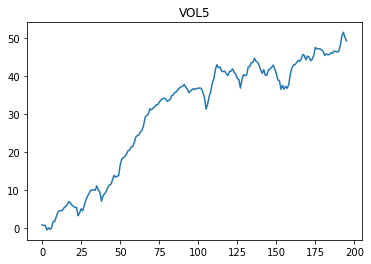

In [174]:
# # 年化超额收益率
# a=output_alpha.mean(1) * 52
# # IC
# CF_ic = new_df.groupby('day').apply(lambda x: cal_IC_rank(x, f, target_return))
# output_sharp_t.mean(1)
t = output_alpha.cumsum(1) + 1
plt.plot(range(196), t.iloc[0].values)
plt.title(f)

In [187]:
output_ic

,IC均值,IC标准差,IC大于0的比例,正相关显著比例（IC>0.02）,负相关显著比例（IC<-0.02）,同向显著次数占比,状态切换次数占比,abs(正-负),同向-切换,IR值,|IC|,最好组年化alpha
0,-0.071995,0.119775,0.260204,0.22449,0.673469,0.612245,0.382653,0.44898,0.229592,-0.601083,0.071995,12.791777


In [104]:
# 分组测试
NUM_Q = 10
n_period = idx_end_day - idx_start_day + 1
factor = 'VOL5'

def test_factor(factor):
    print('测试因子：', factor)

    output_mean=pd.DataFrame()
    output_std=pd.DataFrame()
    output_sharp=pd.DataFrame()
    output_win=pd.DataFrame()

    for i in tqdm(range(idx_start_day, idx_end_day+1)):
    # for i in tqdm(range(idx_start_day, idx_start_day+5)):
        if INTERVAL == 'd':
            day = ALLDAYS[i]
        elif INTERVAL == 'w':
            day = EOW[i]
        elif INTERVAL == 'm':
            day = EOM[i]
        # d=pd.DataFrame() 

        cut = pd.qcut(new_df[new_df.day==day][factor].rank(method='first'), NUM_Q, labels=range(1, NUM_Q+1))
        d1, d2, d3, d4, d5, d6, d7, d8, d9, d10 = [new_df.loc[np.where(cut==i), 'code'] for i in range(1, NUM_Q+1)]
        d = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10] # d_i is the array of group i stocks
        temp_mean=[0] * NUM_Q
        temp_std=[0] * NUM_Q
        temp_win=[0] * NUM_Q
        # excess_mean=[0] * NUM_Q
        # excess_std=[0] * NUM_Q
        # excess_win=[0] * NUM_Q
        for j in range(NUM_Q):
            temp_mean[j] = np.mean(new_df[(new_df.day==day) & (new_df.code.isin(d[j]))][target_return])
        for j in range(NUM_Q):
            temp_std[j] = np.std(new_df[(new_df.day==day) & (new_df.code.isin(d[j]))][target_return])
        for j in range(NUM_Q):
            try:
                temp_win[j] = sum(new_df[(new_df.day==day) & (new_df.code.isin(d[j]))][target_return]>0) / len(new_df[(new_df.day==day) & (new_df.code.isin(d[j]))][target_return])
            except:
                temp_win[j] = 0

        output_mean[day] = temp_mean
        output_std[day] = temp_std
        output_sharp[day] = output_mean[day]/output_std[day]
        output_win[day] = temp_win

    return output_mean, output_std, output_sharp, output_win


output_mean, output_std, output_sharp, output_win = test_factor(factor)

    
    # for j in range(NUM_Q):
    #     sto=get_price(list(d[j]), start_date=y.index[0], end_date=y.index[-1], fields=['close'])['close']
    #     sto=(sto.iloc[0,:]-sto.iloc[-1,:])/sto.iloc[0,:]
    #     excess_mean[j]=(sto-list(ind)).mean()
    #     excess_std[j]=std(sto-list(ind))
    #     excess_win[j]=mean((sto-list(ind))>0)/len(d[j])
    

测试因子： VOL5


100%|██████████| 196/196 [01:42<00:00,  1.90it/s]


In [107]:
output_std

,20180105,20180112,20180119,20180126,20180202,20180209,20180214,20180223,20180302,20180309,...,20210820,20210827,20210903,20210910,20210917,20210924,20210930,20211008,20211015,20211022
0,3.185859,5.078802,5.302440,7.294496,6.281105,5.467415,5.263017,5.069509,5.023129,3.779979,...,7.635487,7.457395,6.625348,7.673432,7.281527,5.626651,7.847660,6.382012,5.641309,5.944795
1,4.942220,5.468614,3.802300,6.909402,7.835863,5.678753,5.270463,5.801219,3.693972,3.760938,...,8.858242,7.532092,7.745486,6.808769,7.560565,6.278304,7.409379,6.255394,5.187197,7.853561
2,3.269304,5.441384,4.888380,7.278917,6.144086,5.041224,5.092547,6.480646,4.809016,4.166849,...,8.478544,7.766815,5.654146,6.919588,6.595745,5.798712,6.540742,7.102919,5.895577,6.670789
3,3.608751,4.683119,3.651149,6.798838,5.912380,4.808995,5.112714,5.677875,5.851346,4.538026,...,8.337121,7.834863,6.990524,8.052258,7.876917,5.570327,6.907581,6.433052,5.354760,7.355311
4,3.196387,4.657174,4.917126,6.733247,5.519744,5.804839,5.588233,5.453933,5.559699,3.769668,...,7.059914,7.731239,6.535436,6.625485,7.674633,5.741827,7.166027,6.436570,6.000964,6.589870
5,4.118182,4.311695,4.333540,6.189024,5.928583,5.382934,4.420550,5.575203,4.401024,4.368580,...,8.218001,7.175562,6.748508,6.931380,7.787733,6.397565,7.008090,6.129777,6.042488,5.803155
6,4.662566,4.422656,4.441166,6.314175,5.058340,4.823726,5.074388,5.767682,4.072271,4.227384,...,8.231615,7.394171,7.735156,6.984940,7.609207,6.643305,7.066570,6.418103,5.969431,5.754911
7,5.071535,4.310889,3.976648,7.572799,5.409190,6.135450,4.908841,5.793513,4.452345,4.235399,...,7.883139,7.343874,6.629901,6.402515,6.102807,5.977912,6.972872,5.909599,5.582784,6.740673
8,5.619937,5.455238,4.199617,7.527298,6.214417,4.956065,5.206849,5.623627,4.720442,4.373374,...,8.721471,7.838948,6.801043,7.932747,7.349309,6.439733,6.801705,5.862847,6.557742,5.617942
9,4.753523,5.777958,3.766178,6.783891,6.862721,4.624409,5.548959,5.398814,5.128869,4.899510,...,7.640890,8.101118,6.883508,6.873284,6.521871,6.347626,7.117651,6.409643,5.001948,6.797687


In [111]:
# 因子收益率检验
def test_factor_return(output_mean, output_std, output_sharp, output_win):
    a = pd.DataFrame()
    # 平均收益（各组）(年化---复利下)
    a[0] = (output_mean.mean(axis=1)/100 + 1)**52 - 1 # 52周
    # 标准差（各组）
    a[1] = (output_std.mean(axis=1))
    # 夏普比率（各组）
    a[2] = output_sharp.mean(axis=1)
    # 胜率（各组）
    a[3] = output_win.mean(axis=1)
    a.columns = ['年化平均收益','标准差','夏普比率','胜率']
    a.index = ['第一组','第二组','第三组','第四组','第五组', '第六组','第七组','第八组','第九组','第十组']
    return a

a = test_factor_return(output_mean, output_std, output_sharp, output_win)
a

,年化平均收益,标准差,夏普比率,胜率
第一组,0.107184,5.767592,0.024622,0.481982
第二组,0.104314,5.775409,0.019039,0.481505
第三组,0.091069,5.676208,0.024374,0.482604
第四组,0.093059,5.658983,0.018211,0.480310
第五组,0.084425,5.641232,0.020004,0.482796
第六组,0.141287,5.695398,0.025350,0.482703
第七组,0.105390,5.665350,0.014307,0.482288
第八组,0.072283,5.602896,0.016620,0.477954
第九组,0.087678,5.670857,0.023625,0.479393
第十组,0.078746,5.718664,0.007478,0.480334


<BarContainer object of 10 artists>

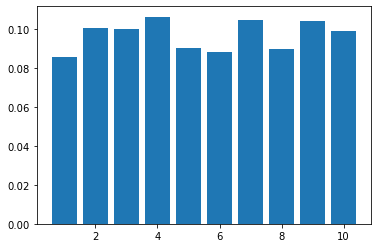

In [19]:
plt.bar(range(1, NUM_Q+1), a['年化平均收益'])


In [20]:
# #因子显著性检验

# 目前没有指数相关数据，无法检验超额收益和胜率？

# b = pd.DataFrame()
# #超额均值
# b[0] = excess_mean
# #跟踪误差
# b[1] = excess_std
# #信息比例
# b[2] = np.array(excess_mean)/np.array(excess_std)
# #t值
# b[3] = np.array(excess_mean)/(np.array(excess_std)/((len(y.columns)/5)**0.5))
# #胜率
# b[4] = excess_win
# b.columns = ['超额均值','跟踪误差','信息比率','T统计量','胜率']
# b.index = ['第一组','第二组','第三组','第四组','第五组', '第六组','第七组','第八组','第九组','第十组']
# b

In [21]:
#因子区分度
c = pd.DataFrame(a.iloc[-1,:]-a.iloc[0,:],columns=['第十组-第一组']).T
c

,年化平均收益,标准差,夏普比率,胜率
第十组-第一组,0.013723,0.272388,0.002335,-0.000126


In [22]:
#因子延续性
#计算IC值序列
def test_factor_IC(new_df, factor):
    d = [0] * 10
    IC = [0] * n_period
    for i in range(n_period):
        iday = idx_start_day + i
        if INTERVAL == 'd':
            day = ALLDAYS[iday]
        elif INTERVAL == 'w':
            day = EOW[iday]
        elif INTERVAL == 'm':
            day = EOM[iday]
        IC[i] = new_df[new_df.day==day][factor].corr(new_df[new_df.day==day][target_return], method='spearman')
    #计算IC值的均值
    d[0] = np.mean(IC) 
    #计算IC值的标准差
    d[1] = np.std(IC)
    #IC大于0的比例
    d[2] = sum(pd.Series(IC)>0)/len(IC)
    #正相关显著比例（IC>0.02）
    d[3] = sum(pd.Series(IC)>0.02)/len(IC)
    #负相关显著比例（IC<-0.02）
    d[4] = sum(pd.Series(IC)<-0.02)/len(IC)
    #同向显著次数占比
    direction = [1 if i > 0 else -1 for i in IC]
    d[5] = sum(np.array(direction)[1:]==np.array(direction)[:-1]) / len(direction)
    #状态切换次数占比
    d[6] = sum(np.array(direction)[1:]!=np.array(direction)[:-1]) / len(direction)
    #abs(正-负)
    d[7] = abs(d[3] - d[4])
    #同向-切换
    d[8] = d[5] - d[6]
    #IR值
    d[9] = np.mean(IC)/np.std(IC) 
    d = pd.DataFrame(d,index=['IC均值','IC标准差','IC大于0的比例','正相关显著比例（IC>0.02）', '负相关显著比例（IC<-0.02）', '同向显著次数占比', '状态切换次数占比', 'abs(正-负)', '同向-切换', 'IR值']).T
    return d

d = test_factor_IC(new_df, factor)
d

,IC均值,IC标准差,IC大于0的比例,正相关显著比例（IC>0.02）,负相关显著比例（IC<-0.02）,同向显著次数占比,状态切换次数占比,abs(正-负),同向-切换,IR值
0,0.005019,0.045974,0.566327,0.367347,0.270408,0.520408,0.47449,0.096939,0.045918,0.109161


### Batch Run Test

In [376]:
# round 2
all_alpha_info = {}
all_std_info = {}
all_IC_info = pd.DataFrame()

for f in tqdm(factor_list):
# for f in tqdm(factor_list[:3]): #测两个看看先
    output_alpha, output_std, output_sharp, output_ic = evaluate_factor(f, new_df)
    all_alpha_info[f] = output_alpha
    all_std_info[f] = output_std
    all_IC_info[f] = output_ic.T
    

100%|██████████| 196/196 [26:52<00:00,  8.23s/it]


In [379]:
all_IC_info.T.sort_values(by='|IC|', ascending=False)
# all_IC_info

,IC均值,IC标准差,IC大于0的比例,正相关显著比例（IC>0.02）,负相关显著比例（IC<-0.02）,同向显著次数占比,状态切换次数占比,abs(正-负),同向-切换,IR值,|IC|,最好组年化alpha
VOL5,-0.073372,0.117927,0.255102,0.224490,0.678571,0.591837,0.403061,0.454082,0.188776,-0.622184,0.073372,11.771681
VOL10,-0.069627,0.117322,0.260204,0.229592,0.673469,0.591837,0.403061,0.443878,0.188776,-0.593473,0.069627,11.697402
TVSTD6,-0.067502,0.097038,0.229592,0.193878,0.704082,0.607143,0.387755,0.510204,0.219388,-0.695621,0.067502,5.808902
TVSTD20,-0.064831,0.099721,0.260204,0.193878,0.673469,0.586735,0.408163,0.479592,0.178571,-0.650127,0.064831,6.478599
VOL20,-0.063162,0.116160,0.295918,0.224490,0.642857,0.540816,0.454082,0.418367,0.086735,-0.543752,0.063162,11.909563
...,...,...,...,...,...,...,...,...,...,...,...,...
BLEV,0.000341,0.053379,0.474490,0.311224,0.346939,0.551020,0.443878,0.035714,0.107143,0.006396,0.000341,-1.945720
LongDebtToAsset,0.000225,0.039133,0.479592,0.311224,0.321429,0.530612,0.464286,0.010204,0.066327,0.005753,0.000225,1.749933
TotalProfitGrowRate,-0.000101,0.079679,0.566327,0.433673,0.362245,0.586735,0.408163,0.071429,0.178571,-0.001273,0.000101,0.718973
LongDebtToWorkingCapital,0.000087,0.035546,0.505102,0.239796,0.275510,0.474490,0.520408,0.035714,-0.045918,0.002442,0.000087,-1.886749


In [380]:
import pickle
all_IC_info.to_pickle('/Users/shaorui/Desktop/CMA/data/all_IC_info.pkl')
with open('/Users/shaorui/Desktop/CMA/data/all_alpha_info.pkl', 'wb') as fp:
    pickle.dump(all_alpha_info, fp)
with open('/Users/shaorui/Desktop/CMA/data/all_std_info.pkl', 'wb') as fp:
    pickle.dump(all_std_info, fp)
print('All info saved!')

All info saved!


In [195]:
all_alpha_info['AccountsPayablesTRate'].mean(1)*52

第1组    -1.648774
第2组     1.474584
第3组     1.281029
第4组     0.305616
第5组     2.717075
第6组     0.951763
第7组    -0.273012
第8组    -0.668412
第9组    -2.540145
第10组   -1.644032
dtype: float64

In [ ]:
all_return_info = {}
all_diff_info = {}
all_IC_info = pd.DataFrame()


In [ ]:
for f in tqdm(factor_list[2:]):
# for f in factor_list[:2]: #测两个看看先
    output_mean, output_std, output_sharp, output_win = test_factor(f)
    a = test_factor_return(output_mean, output_std, output_sharp, output_win)
    c = pd.DataFrame(a.iloc[-1,:]-a.iloc[0,:],columns=['第十组-第一组']).T
    d = test_factor_IC(new_df, f)
    
    all_return_info[f] = a
    all_diff_info[f] = c
    all_IC_info[f] = d.T
    
    
    

In [283]:
# Save info
import pickle

with open('/Users/shaorui/Desktop/CMA/all_return_info.pkl', 'wb') as fp:
    pickle.dump(all_return_info, fp)
    print('all_return_info.pkl saved')
with open('/Users/shaorui/Desktop/CMA/all_diff_info.pkl', 'wb') as fp:
    pickle.dump(all_diff_info, fp)
    print('all_diff_info.pkl saved')

all_IC_info.to_csv('/Users/shaorui/Desktop/CMA/all_IC_info.csv',  encoding='utf-8', index=True)
print('all_IC_info.csv saved')

all_return_info.pkl saved
all_diff_info.pkl saved
all_IC_info.csv saved


In [282]:
all_IC_info

,ACCA,AccountsPayablesTDays,AccountsPayablesTRate,ACD20,ACD6,AD,AD20,AD6,AdminiExpenseRate,ADTM,...,VOL5,VOL60,Volatility,VOSC,VR,VROC12,VROC6,VSTD10,VSTD20,WVAD
IC均值,0.005019,-0.009369,0.002345,-0.050726,-0.039467,-0.000655,0.000364,-0.000369,0.000548,-0.038346,...,-0.065892,-0.044916,-0.031661,-0.022926,-0.029294,-0.009669,-0.011242,-0.003853,-0.006710,-0.039322
IC标准差,0.045974,0.098075,0.041836,0.113801,0.110044,0.067874,0.065983,0.067205,0.095851,0.111237,...,0.115943,0.111119,0.064321,0.089092,0.093973,0.091795,0.092727,0.078724,0.095220,0.093605
IC大于0的比例,0.566327,0.454082,0.505102,0.331633,0.367347,0.443878,0.448980,0.454082,0.479592,0.362245,...,0.280612,0.341837,0.326531,0.372449,0.367347,0.474490,0.433673,0.474490,0.479592,0.341837
正相关显著比例（IC>0.02）,0.367347,0.367347,0.306122,0.285714,0.311224,0.382653,0.382653,0.377551,0.372449,0.306122,...,0.214286,0.275510,0.214286,0.306122,0.290816,0.357143,0.331633,0.397959,0.387755,0.260204
负相关显著比例（IC<-0.02）,0.270408,0.454082,0.280612,0.596939,0.561224,0.397959,0.397959,0.397959,0.443878,0.581633,...,0.642857,0.591837,0.551020,0.540816,0.540816,0.464286,0.428571,0.403061,0.448980,0.576531
同向显著次数占比,0.520408,0.566327,0.489796,0.530612,0.576531,0.566327,0.576531,0.545918,0.489796,0.545918,...,0.602041,0.591837,0.545918,0.530612,0.525510,0.505102,0.556122,0.551020,0.540816,0.556122
状态切换次数占比,0.474490,0.428571,0.505102,0.464286,0.418367,0.428571,0.418367,0.448980,0.505102,0.448980,...,0.392857,0.403061,0.448980,0.464286,0.469388,0.489796,0.438776,0.443878,0.454082,0.438776
abs(正-负),0.096939,0.086735,0.025510,0.311224,0.250000,0.015306,0.015306,0.020408,0.071429,0.275510,...,0.428571,0.316327,0.336735,0.234694,0.250000,0.107143,0.096939,0.005102,0.061224,0.316327
同向-切换,0.045918,0.137755,-0.015306,0.066327,0.158163,0.137755,0.158163,0.096939,-0.015306,0.096939,...,0.209184,0.188776,0.096939,0.066327,0.056122,0.015306,0.117347,0.107143,0.086735,0.117347
IR值,0.109161,-0.095528,0.056047,-0.445744,-0.358650,-0.009651,0.005522,-0.005493,0.005722,-0.344727,...,-0.568315,-0.404218,-0.492224,-0.257332,-0.311723,-0.105330,-0.121237,-0.048944,-0.070467,-0.420091


## 因子筛选

In [6]:
# 读取因子数据
import pickle
import pandas as pd

# with open('/Users/shaorui/Desktop/CMA/all_return_info.pkl', 'rb') as fp:
#     all_return_info = pickle.load(fp)
# with open('/Users/shaorui/Desktop/CMA/all_diff_info.pkl', 'rb') as fp:
#     all_diff_info = pickle.load(fp)
# all_IC_info = pd.read_csv('/Users/shaorui/Desktop/CMA/all_IC_info.csv',  encoding='utf-8', index_col=0)

with open('/Users/shaorui/Desktop/CMA/data/all_alpha_info.pkl', 'rb') as fp:
    all_alpha_info = pickle.load(fp)
with open('/Users/shaorui/Desktop/CMA/data/all_std_info.pkl', 'rb') as fp:
    all_std_info = pickle.load(fp)
all_IC_info = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/all_IC_info.pkl')

all_IC_info = all_IC_info.T

print('Finish loading!')

Finish loading!


In [33]:
# 计算年化Sharpe
for f in factor_list:
    if all_IC_info.loc[f, 'IC均值'] > 0:
        all_IC_info.loc[f, '最好组年化Sharpe'] = (all_alpha_info[f].mean(1) / all_alpha_info[f].std(1) * np.sqrt(52)).iloc[-1]
    else:
        all_IC_info.loc[f, '最好组年化Sharpe'] = (all_alpha_info[f].mean(1) / all_alpha_info[f].std(1) * np.sqrt(52)).iloc[0]
    
all_IC_info

,IC均值,IC标准差,IC大于0的比例,正相关显著比例（IC>0.02）,负相关显著比例（IC<-0.02）,同向显著次数占比,状态切换次数占比,abs(正-负),同向-切换,IR值,|IC|,最好组年化alpha,最好组年化Sharpe
GREV,0.006082,0.043900,0.545918,0.367347,0.265306,0.535714,0.459184,0.102041,0.076531,0.138550,0.006082,13.117749,1.570088
VOL60,-0.050239,0.115778,0.311224,0.265306,0.617347,0.540816,0.454082,0.352041,0.086735,-0.433927,0.050239,11.976767,1.883574
VOL20,-0.063162,0.116160,0.295918,0.224490,0.642857,0.540816,0.454082,0.418367,0.086735,-0.543752,0.063162,11.909563,1.862297
VOL5,-0.073372,0.117927,0.255102,0.224490,0.678571,0.591837,0.403061,0.454082,0.188776,-0.622184,0.073372,11.771681,1.822639
VOL10,-0.069627,0.117322,0.260204,0.229592,0.673469,0.591837,0.403061,0.443878,0.188776,-0.593473,0.069627,11.697402,1.804193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VMACD,-0.017877,0.087461,0.372449,0.311224,0.551020,0.540816,0.454082,0.239796,0.086735,-0.204399,0.017877,-7.374166,-0.924510
FiftyTwoWeekHigh,-0.027710,0.130498,0.423469,0.377551,0.515306,0.515306,0.479592,0.137755,0.035714,-0.212337,0.027710,-7.383013,-0.969533
InventoryTRate,-0.002243,0.094447,0.494898,0.403061,0.408163,0.545918,0.448980,0.005102,0.096939,-0.023744,0.002243,-8.040277,-1.305900
HBETA,-0.004292,0.110464,0.489796,0.418367,0.474490,0.433673,0.561224,0.056122,-0.127551,-0.038851,0.004292,-8.234962,-1.207363


In [34]:
all_IC_info.sort_values(by = '最好组年化alpha', ascending=False, inplace=True)
all_IC_info[:60][['IC均值','|IC|','最好组年化alpha', '最好组年化Sharpe']]

,IC均值,|IC|,最好组年化alpha,最好组年化Sharpe
GREV,0.006082,0.006082,13.117749,1.570088
VOL60,-0.050239,0.050239,11.976767,1.883574
VOL20,-0.063162,0.063162,11.909563,1.862297
VOL5,-0.073372,0.073372,11.771681,1.822639
VOL10,-0.069627,0.069627,11.697402,1.804193
VOL120,-0.039837,0.039837,11.153757,1.757885
ACD6,-0.040522,0.040522,10.296991,1.072070
VOL240,-0.030228,0.030228,10.218589,1.637308
GSREV,0.003491,0.003491,10.084549,1.390891
PLRC6,-0.040548,0.040548,9.215427,0.917544


In [50]:
# significant_factors = all_IC_info[(all_IC_info['|IC|'] > 0.02) & (all_IC_info['最好组年化alpha'] > 3)]
# significant_factors = all_IC_info[all_IC_info['最好组年化alpha'] > 4]
significant_factors = all_IC_info[(all_IC_info['|IC|'] > 0.02) & (all_IC_info['最好组年化alpha'] > 4) & (all_IC_info['最好组年化Sharpe'] > 0.5)]

len(significant_factors)

33

In [51]:
# |mean(IC)| > 0.02, 年化收益率降序
significant_factors.index

Index(['VOL60', 'VOL20', 'VOL5', 'VOL10', 'VOL120', 'ACD6', 'VOL240', 'PLRC6',
       'ACD20', 'BearPower', 'EPS', 'VEMA26', 'VSTD20', 'VEMA5', 'VEMA10',
       'DilutedEPS', 'BIAS60', 'VEMA12', 'TVSTD20', 'TOBT', 'TA2EV', 'VSTD10',
       'PLRC12', 'CFO2EV', 'TVSTD6', 'Volatility', 'JDQS20', 'DDNCR', 'TVMA20',
       'MoneyFlow20', 'CTOP', 'HSIGMA', 'CCI5'],
      dtype='object')

In [61]:
significant_factors.to_pickle('/Users/shaorui/Desktop/CMA/data/selected_factors.pkl')

In [58]:
selected_factors = all_IC_info.loc[significant_factors.index, :]
selected_factors

,IC均值,IC标准差,IC大于0的比例,正相关显著比例（IC>0.02）,负相关显著比例（IC<-0.02）,同向显著次数占比,状态切换次数占比,abs(正-负),同向-切换,IR值,|IC|,最好组年化alpha,最好组年化Sharpe
VOL60,-0.050239,0.115778,0.311224,0.265306,0.617347,0.540816,0.454082,0.352041,0.086735,-0.433927,0.050239,11.976767,1.883574
VOL20,-0.063162,0.116160,0.295918,0.224490,0.642857,0.540816,0.454082,0.418367,0.086735,-0.543752,0.063162,11.909563,1.862297
VOL5,-0.073372,0.117927,0.255102,0.224490,0.678571,0.591837,0.403061,0.454082,0.188776,-0.622184,0.073372,11.771681,1.822639
VOL10,-0.069627,0.117322,0.260204,0.229592,0.673469,0.591837,0.403061,0.443878,0.188776,-0.593473,0.069627,11.697402,1.804193
VOL120,-0.039837,0.109548,0.362245,0.275510,0.576531,0.520408,0.474490,0.301020,0.045918,-0.363648,0.039837,11.153757,1.757885
ACD6,-0.040522,0.109267,0.372449,0.295918,0.545918,0.576531,0.418367,0.250000,0.158163,-0.370858,0.040522,10.296991,1.072070
VOL240,-0.030228,0.105155,0.357143,0.295918,0.551020,0.530612,0.464286,0.255102,0.066327,-0.287459,0.030228,10.218589,1.637308
PLRC6,-0.040548,0.117338,0.367347,0.285714,0.591837,0.510204,0.484694,0.306122,0.025510,-0.345569,0.040548,9.215427,0.917544
ACD20,-0.051194,0.110526,0.352041,0.275510,0.602041,0.500000,0.494898,0.326531,0.005102,-0.463184,0.051194,8.769615,0.945367
BearPower,-0.029559,0.122748,0.403061,0.301020,0.545918,0.464286,0.530612,0.244898,-0.066327,-0.240812,0.029559,8.054088,0.753548


In [53]:
# 单因子细节分析
f='ROC20'
all_IC_info.T[f]

IC均值                -0.053658
IC标准差                0.124679
IC大于0的比例             0.362245
正相关显著比例（IC>0.02）     0.285714
负相关显著比例（IC<-0.02）    0.602041
同向显著次数占比             0.535714
状态切换次数占比             0.459184
abs(正-负)             0.316327
同向-切换                0.076531
IR值                 -0.430369
|IC|                 0.053658
最好组年化alpha           4.062582
最好组年化Sharpe          0.460803
Name: ROC20, dtype: float64

In [54]:
all_alpha_info[f].mean(1)*52

第1组      4.062582
第2组      4.157557
第3组      4.171436
第4组      5.492004
第5组      4.302542
第6组      6.241726
第7组      5.983484
第8组      2.191452
第9组     -6.961228
第10组   -30.107702
dtype: float32

Text(0.5, 1.0, 'ROC20')

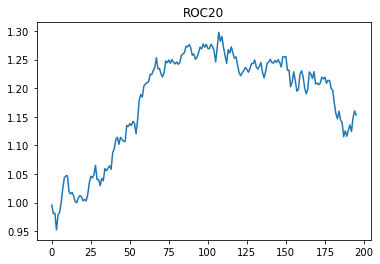

In [55]:
# f = 'GREV'
t = (all_alpha_info[f]/100).cumsum(1) + 1
plt.plot(range(196), t.iloc[0].values)
plt.title(f)

## XGBoost建模

In [73]:
from pandas_datareader import data as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from   scipy.io import loadmat
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from sklearn.model_selection import StratifiedKFold, cross_val_score  # 导入交叉检验算法
from sklearn.feature_selection import SelectPercentile, f_classif  # 导入特征选择方法库
from sklearn.pipeline import Pipeline  # 导入Pipeline库
from sklearn.metrics import accuracy_score  # 准确率指标
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from utility_funcs import *

import warnings
warnings.filterwarnings('ignore')


In [71]:
all_alpha_info = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/all_alpha_info.pkl')
all_std_info = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/all_std_info.pkl')
all_IC_info = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/all_IC_info.pkl')

factors = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/factors.pkl')
neutralized_factors = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/neutralized_factors.pkl')
selected_factors = pd.read_pickle('/Users/shaorui/Desktop/CMA/data/selected_factors.pkl')

all_IC_info = all_IC_info.T

factor_list = list(neutralized_factors.columns[-196:])

print('Finish loading!')

Finish loading!
